<a href="https://colab.research.google.com/github/20aclaypool/Notes/blob/class-notes/Day08_P1_SVM_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day08 Notes (Code): PCA and SVM
Thursday, January 12th, 2023

## Support Vector Machines (SVM)

In [1]:
#import libraries
from google.colab import drive
import pandas as pd
import numpy
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

import matplotlib.pyplot as plt
from itertools import product
%matplotlib inline

#load data
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data = pd.read_csv('/content/drive/MyDrive/CS167/datasets/irisData.csv')
predictors = ['sepal length', 'sepal width', 'petal length', 'petal width']
target = "species"

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
train_data.head()

,sepal length,sepal width,petal length,petal width
79,5.7,2.6,3.5,1.0
54,6.5,2.8,4.6,1.5
106,4.9,2.5,4.5,1.7
90,5.5,2.6,4.4,1.2
145,6.7,3.0,5.2,2.3


### Let's use `sklearn` to classify the Iris data:
- Documentation: [`sklearn.svm.SVC()`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [3]:
#load up scikit-learn SVC (Support Vector Classifier)
clf = SVC()
clf.fit(train_data,train_sln)
predictions = clf.predict(test_data)

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, predictions))
vals = data[target].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

accuracy: 0.9333333333333333
                   Pred Iris-setosa  Pred Iris-versicolor  Pred Iris-virginica
T Iris-setosa                     9                     0                    0
T Iris-versicolor                 0                    10                    1
T Iris-virginica                  0                     1                    9


This is a function that will plot out the decision boundary for the model that we pass into the function. It can only plot the decision boundary in 2D, so you have to pass it two features to look at:
- It takes in 4 parameters: 
  - `data`: the dataframe you're working with
  - `x_name`: the first feature you want the function to look at 
  - `y_name`: the second feature you want the function to look at
  - `target_name`: the name of the target variable
  - `clf`: the classification model you built using sklearn

In [4]:
#Credit to Professor Eric Manley for this function
import pandas
#This code is based on the example here: http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
#Parameters: the data set as a Pandas dataframe, the names of the predictors to put on the x and y axes,
#the name of the target column, and the classifier object to use

def plot_decision_boundary(data,x_name,y_name,target_name,clf):
    
    #list of the values appearing in the target column
    class_labels = data[target_name].unique()

    #converting from categorical target values to numbers so we can plot them with a contour plot
    target_col_nums = data[target_name].replace(to_replace=class_labels,value=range(len(data[target_name].unique())))

    #create a grid of points representing new cases that we need a prediction for
    #these will serve as the basis for drawing the contours
    x_points = numpy.linspace(data[x_name].min(), data[x_name].max(), 300)
    y_points = numpy.linspace(data[y_name].min(), data[y_name].max(), 300)
    X, Y = numpy.meshgrid(x_points,y_points)

    #train our classifier
    clf.fit(data[[x_name,y_name]],target_col_nums)

    #create the dataframe with all the points in our grid
    plot_points = pandas.DataFrame(list(product(x_points,y_points)), columns=[x_name,y_name])

    #get predictions for each point in our grid
    predictions = pandas.Series(clf.predict(plot_points))
    
    #predictions will be a big 1D array, so reshape them to 2-dimensions, same as the shape of the grid
    Z = predictions.values.reshape(X.shape)

    #draw the filled-in contours
    plt.contourf(X, Y, Z,cmap=plt.cm.coolwarm)

    #we will plot the training data using a scatter plot, so
    #need to grab the same number of colors used by contourf
    point_colors = plt.cm.coolwarm(numpy.linspace(0,1,len(class_labels)))

    #scatter plot each of the classes in our target column
    for curr_class in range(len(class_labels)):
        curr_subset = data[target_col_nums == curr_class]
        plt.scatter(curr_subset[x_name],curr_subset[y_name],color=point_colors[curr_class],edgecolors='k',label=class_labels[curr_class])
    
    #display the plot and accompanying info
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title(str(clf)+'\ntraining set accuracy:'+str(clf.score(data[[x_name,y_name]],target_col_nums)))
    legend = plt.legend(loc='lower right')
    legend.get_frame().set_facecolor('silver')
    plt.show()

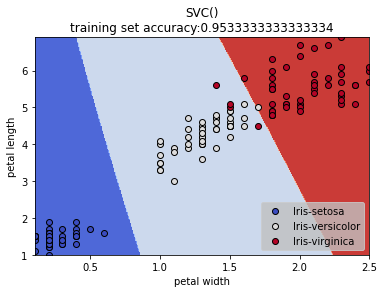

In [5]:
#default SVC
plot_decision_boundary(data,'petal width','petal length','species',SVC())

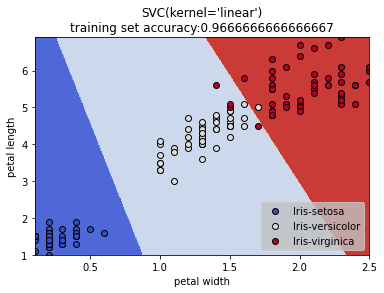

In [6]:
#linear kernel
plot_decision_boundary(data,'petal width','petal length','species',SVC(kernel='linear'))

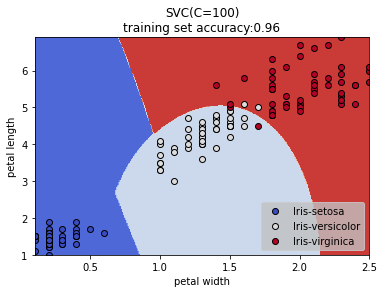

In [7]:
#larger value for C
plot_decision_boundary(data,'petal width','petal length','species',SVC(C=100))

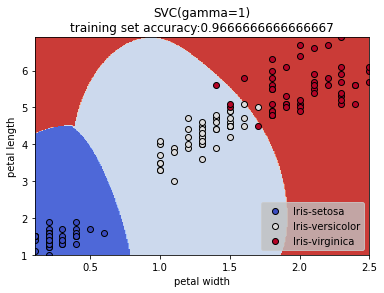

In [8]:
# set gamma
plot_decision_boundary(data,'petal width','petal length','species',SVC(gamma=1))

## Exercise #1:
Documentation: [`sklearn.svm.SVC()`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

1. What are the parameters that we should consider tuning? Discuss.
2. Play around with changing these parameters and plotting the decision boundary.
3. Are the restuls what you expect? Why or why. not?
4. Can you get 100% accuracy?


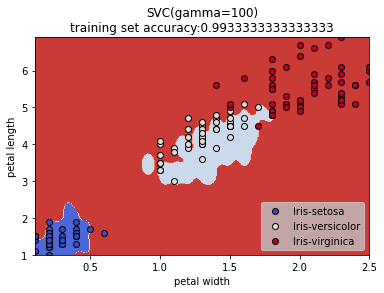

In [9]:
# exercise #1 code here
plot_decision_boundary(data,'petal width','petal length','species',SVC(gamma=100))

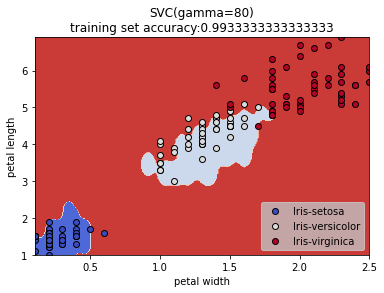

In [10]:
plot_decision_boundary(data,'petal width','petal length','species',SVC(gamma=80))

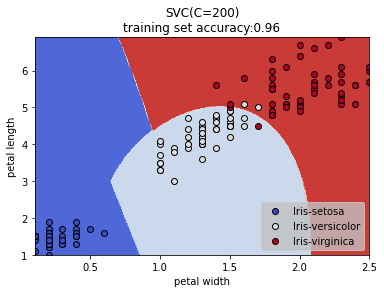

In [17]:
plot_decision_boundary(data,'petal width','petal length','species',SVC(C=200))

## Exercise #2:

Try using the supplied code to experiment with how other algorithms will be mapped. Are the decision boundaries what you expect?

- KNN
- Decision Trees
- Random Forests

In [ ]:
# exercise #2 code here